In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras

df = pd.read_csv("diabetes.csv")
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [2]:
df.columns


Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [3]:
X=df.drop('Outcome',axis=1)
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [4]:
y=df['Outcome']
y.value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

### 원 핫 인코딩

In [5]:
Y = pd.get_dummies(y).values

### Numpy 변환

In [17]:
X = X.values


In [18]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=0) 

In [19]:
#Defining the model 

from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD,Adam


model = Sequential()

model.add(Dense(8,input_shape=(8,),activation='tanh'))
model.add(Dense(6,activation='tanh'))
model.add(Dense(4,activation='tanh'))
model.add(Dense(2,activation='softmax'))

model.compile(Adam(lr=0.04),'categorical_crossentropy',metrics=['accuracy'])

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 8)                 72        
                                                                 
 dense_13 (Dense)            (None, 6)                 54        
                                                                 
 dense_14 (Dense)            (None, 4)                 28        
                                                                 
 dense_15 (Dense)            (None, 2)                 10        
                                                                 
Total params: 164 (656.00 Byte)
Trainable params: 164 (656.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [20]:
model_history=model.fit(x=X_train, y=y_train, epochs=30, batch_size=32,validation_data= (X_test,y_test))
y_pred = model.predict(X_test)

y_test_class = np.argmax(y_test,axis=1)
y_pred_class = np.argmax(y_pred,axis=1)

Epoch 1/30
20/20 [==============================] - 1s 8ms/step - loss: 0.8475 - accuracy: 0.6319 - val_loss: 0.7609 - val_accuracy: 0.6948
Epoch 2/30
20/20 [==============================] - 0s 3ms/step - loss: 0.8007 - accuracy: 0.6319 - val_loss: 0.7272 - val_accuracy: 0.6883
Epoch 3/30
20/20 [==============================] - 0s 3ms/step - loss: 0.7637 - accuracy: 0.6303 - val_loss: 0.6938 - val_accuracy: 0.6883
Epoch 4/30
20/20 [==============================] - 0s 3ms/step - loss: 0.7261 - accuracy: 0.6319 - val_loss: 0.6620 - val_accuracy: 0.6883
Epoch 5/30
20/20 [==============================] - 0s 3ms/step - loss: 0.6976 - accuracy: 0.6319 - val_loss: 0.6421 - val_accuracy: 0.6883
Epoch 6/30
20/20 [==============================] - 0s 3ms/step - loss: 0.6765 - accuracy: 0.6336 - val_loss: 0.6265 - val_accuracy: 0.6883
Epoch 7/30
20/20 [==============================] - 0s 3ms/step - loss: 0.6630 - accuracy: 0.6336 - val_loss: 0.6164 - val_accuracy: 0.6883
Epoch 8/30
20/20 [==

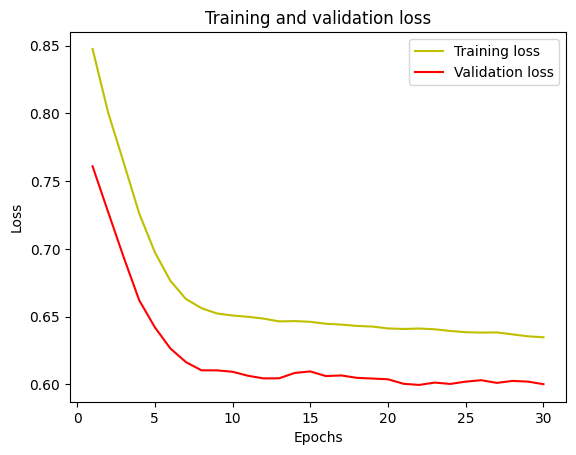

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

loss =model_history.history['loss']
val_loss =model_history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

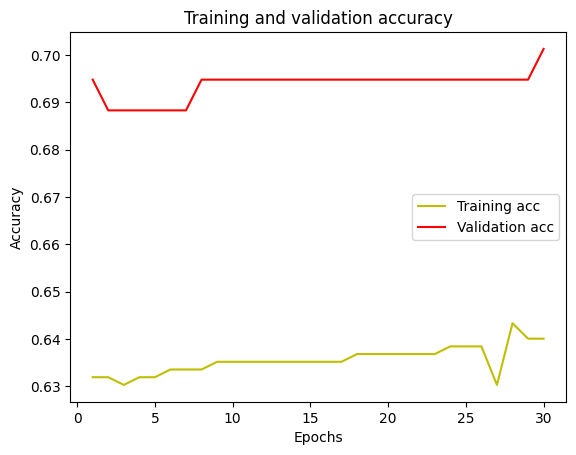

In [22]:
acc =model_history.history['accuracy']
val_acc =model_history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [23]:
#Accuracy of the predicted values
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test_class,y_pred_class))
print(confusion_matrix(y_test_class,y_pred_class))

              precision    recall  f1-score   support

           0       0.70      0.99      0.82       107
           1       0.67      0.04      0.08        47

    accuracy                           0.70       154
   macro avg       0.68      0.52      0.45       154
weighted avg       0.69      0.70      0.60       154

[[106   1]
 [ 45   2]]
